In [1]:
import pandas as pd
from prophet import Prophet
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

C:\Users\madhu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_test=pd.read_csv(r"E:\Courses\Data Science\Data\7 - Time Series Forecasting\4 - Multi Variate Forecasting\DailyDelhiClimateTest.csv")
df_train=pd.read_csv(r"E:\Courses\Data Science\Data\7 - Time Series Forecasting\4 - Multi Variate Forecasting\DailyDelhiClimateTrain.csv")
df=df_train
df_train

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [3]:
len(df_test)

114

In [4]:
len(df_train)

1462

In [5]:
df_test

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [6]:
df_train.head(5)

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


# Uni-Variate Forecasting

In [7]:
df_train = df_train.rename(columns={'meantemp': 'y', 'date':'ds'})
df_train['y_orig'] = df_train['y'] # to save a copy of the original data..you'll see why shortly.
df_train['y'] = np.log(df_train['y'])


In [8]:
df_train.head(5)

,ds,y,humidity,wind_speed,meanpressure,y_orig
0,2013-01-01,2.302585,84.500000,0.000000,1015.666667,10.000000
1,2013-01-02,2.001480,92.000000,2.980000,1017.800000,7.400000
2,2013-01-03,1.969441,87.000000,4.633333,1018.666667,7.166667
3,2013-01-04,2.159484,71.333333,1.233333,1017.166667,8.666667
4,2013-01-05,1.791759,86.833333,3.700000,1016.500000,6.000000


In [9]:
model = Prophet() #instantiate Prophet
model.fit(df_train)

11:59:50 - cmdstanpy - INFO - Chain [1] start processing
11:59:51 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
''' 'year': 'A',
        'quarter': 'Q',
        'month': 'M',
        'day': 'D',
        'hour': 'H',
        'minute': 'T',
        'second': 'S',
        'millisecond': 'L',
        'microsecond': 'U',
        'nanosecond': 'N'}
'''


future_data = model.make_future_dataframe(periods=113, freq = 'D')

forecast_data = model.predict(future_data)

forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1570,2017-04-20,3.550276,3.428063,3.689456
1571,2017-04-21,3.554043,3.423022,3.683765
1572,2017-04-22,3.554319,3.432176,3.681451
1573,2017-04-23,3.553686,3.435981,3.677104
1574,2017-04-24,3.570948,3.447101,3.693490


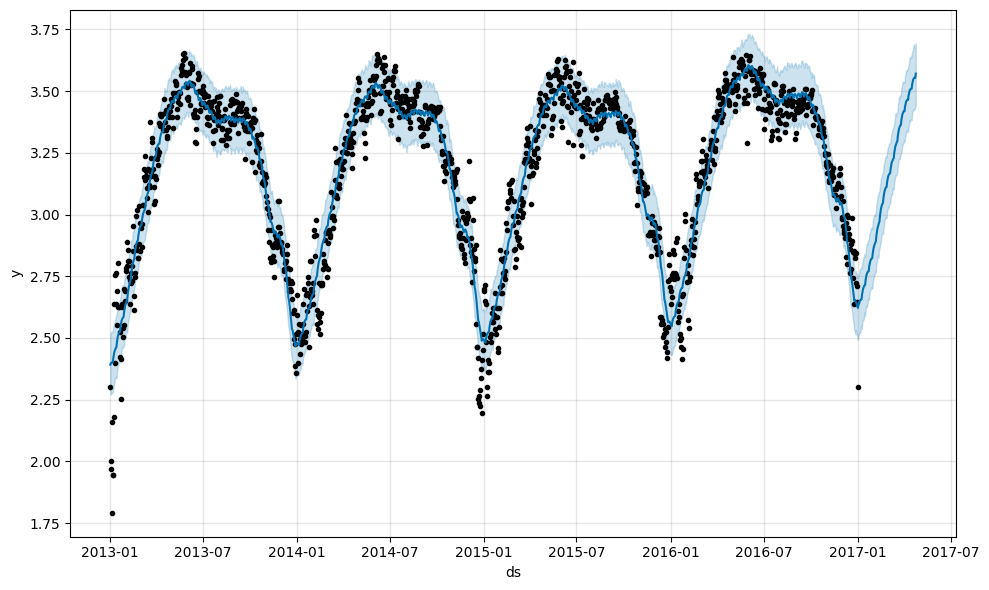

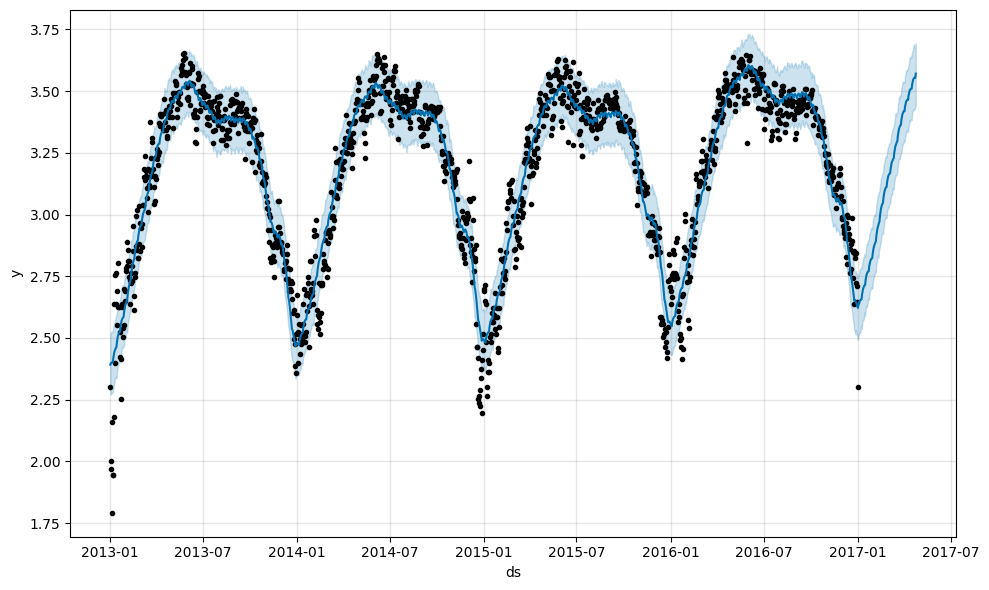

In [11]:
model.plot(forecast_data)

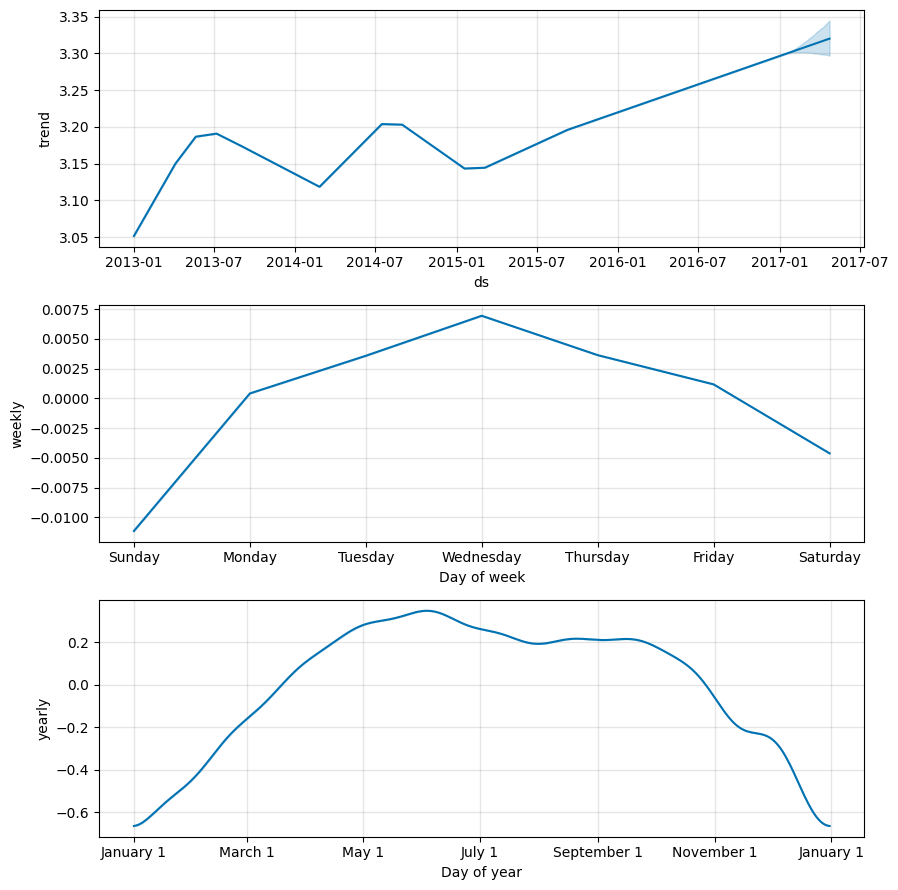

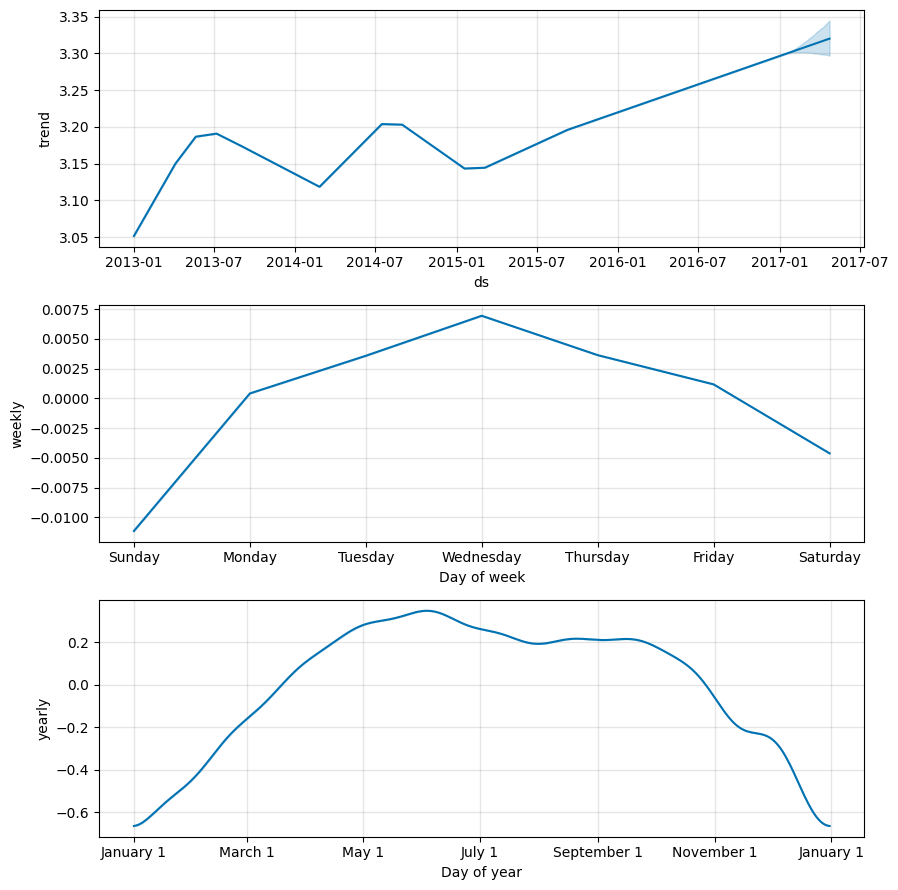

In [12]:
model.plot_components(forecast_data)

In [13]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

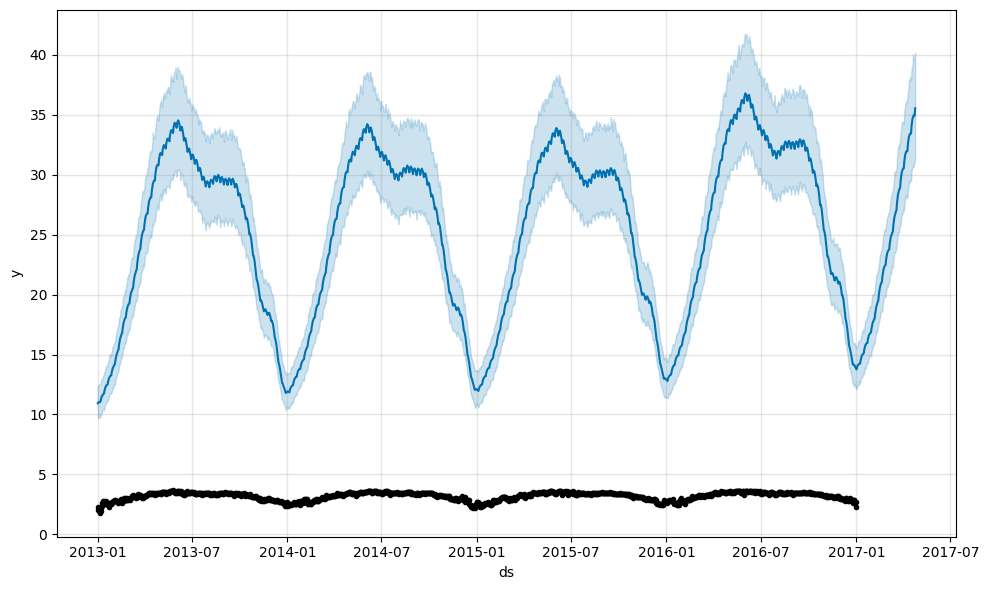

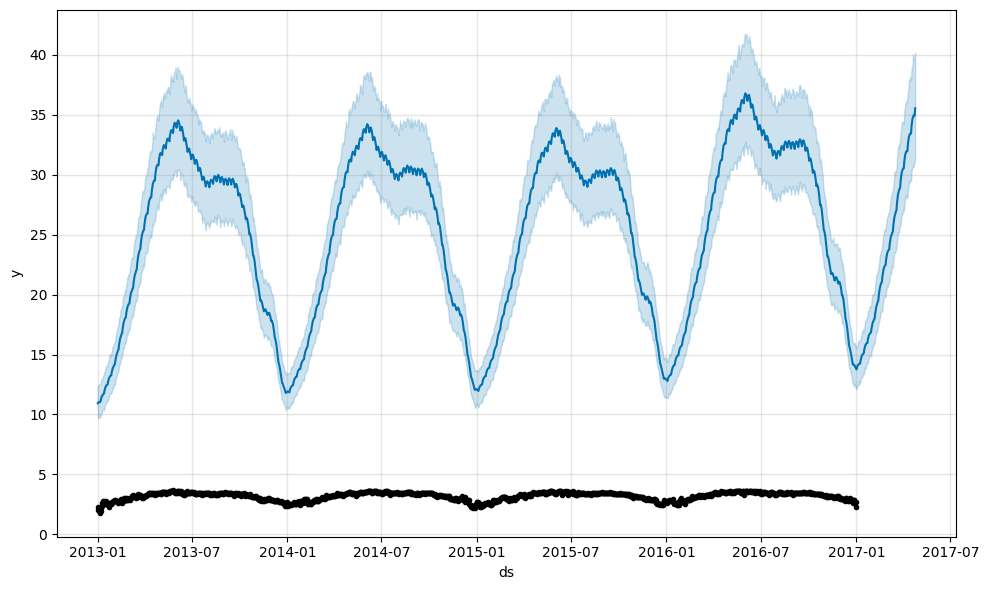

In [14]:
model.plot(forecast_data_orig)

In [15]:
df_train['y_log']=df_train['y'] #copy the log-transformed data to another column
df_train['y']=df_train['y_orig']

In [16]:
final_df = pd.DataFrame(forecast_data_orig)
import plotly.graph_objs as go
import plotly.offline as py
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df_train["y_orig"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower])

'temp-plot.html'

In [17]:
df_test.head(5)

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [18]:
final_df.tail(113)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1462,2017-01-02,3.296631,12.309173,15.641452,3.296631,3.296631,-0.661617,-0.661617,-0.661617,0.000416,0.000416,0.000416,-0.662033,-0.662033,-0.662033,0.0,0.0,0.0,13.943509
1463,2017-01-03,3.296840,12.371784,15.775871,3.296840,3.296840,-0.655585,-0.655585,-0.655585,0.003585,0.003585,0.003585,-0.659170,-0.659170,-0.659170,0.0,0.0,0.0,14.030804
1464,2017-01-04,3.297049,12.429594,16.018192,3.297049,3.297049,-0.648228,-0.648228,-0.648228,0.006954,0.006954,0.006954,-0.655182,-0.655182,-0.655182,0.0,0.0,0.0,14.137365
1465,2017-01-05,3.297258,12.480317,16.091916,3.297258,3.297258,-0.646555,-0.646555,-0.646555,0.003641,0.003641,0.003641,-0.650196,-0.650196,-0.650196,0.0,0.0,0.0,14.164005
1466,2017-01-06,3.297468,12.466283,16.085921,3.297468,3.297468,-0.643163,-0.643163,-0.643163,0.001182,0.001182,0.001182,-0.644345,-0.644345,-0.644345,0.0,0.0,0.0,14.215096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570,2017-04-20,3.319225,30.816889,40.023053,3.297668,3.342304,0.231051,0.231051,0.231051,0.003641,0.003641,0.003641,0.227410,0.227410,0.227410,0.0,0.0,0.0,34.822914
1571,2017-04-21,3.319434,30.661946,39.795951,3.297507,3.342945,0.234609,0.234609,0.234609,0.001182,0.001182,0.001182,0.233427,0.233427,0.233427,0.0,0.0,0.0,34.954347
1572,2017-04-22,3.319643,30.943903,39.703944,3.297322,3.343402,0.234676,0.234676,0.234676,-0.004622,-0.004622,-0.004622,0.239298,0.239298,0.239298,0.0,0.0,0.0,34.964002
1573,2017-04-23,3.319852,31.061874,39.531726,3.297110,3.343841,0.233834,0.233834,0.233834,-0.011156,-0.011156,-0.011156,0.244990,0.244990,0.244990,0.0,0.0,0.0,34.941875


In [19]:
rows = final_df["yhat"].tail(113)

In [20]:
rows = rows.reset_index()

In [21]:
rows.pop('index')

0      1462
1      1463
2      1464
3      1465
4      1466
       ... 
108    1570
109    1571
110    1572
111    1573
112    1574
Name: index, Length: 113, dtype: int64

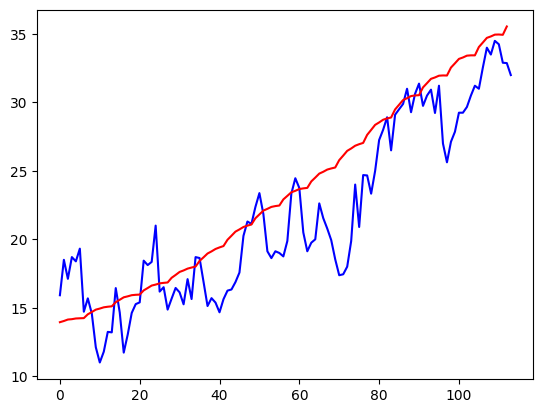

In [22]:
# plot

import matplotlib.pyplot as plt
plt.plot(df_test['meantemp'], color = 'blue')
plt.plot(rows, color='red')
plt.show()

# Multi-Variate Forecasting

In [23]:
df_test=pd.read_csv(r"E:\Courses\Data Science\Data\7 - Time Series Forecasting\4 - Multi Variate Forecasting\DailyDelhiClimateTest.csv")
df_train=pd.read_csv(r"E:\Courses\Data Science\Data\7 - Time Series Forecasting\4 - Multi Variate Forecasting\DailyDelhiClimateTrain.csv")
df=df_train
df_train

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [24]:
df_train = df_train.rename(columns={'meantemp': 'y', 'date':'ds'})
df_train['y_orig'] = df_train['y'] # to save a copy of the original data..you'll see why shortly.
df_train['y'] = np.log(df_train['y'])

In [25]:
df_train.head(5)

,ds,y,humidity,wind_speed,meanpressure,y_orig
0,2013-01-01,2.302585,84.500000,0.000000,1015.666667,10.000000
1,2013-01-02,2.001480,92.000000,2.980000,1017.800000,7.400000
2,2013-01-03,1.969441,87.000000,4.633333,1018.666667,7.166667
3,2013-01-04,2.159484,71.333333,1.233333,1017.166667,8.666667
4,2013-01-05,1.791759,86.833333,3.700000,1016.500000,6.000000


In [26]:


model_new = Prophet() #instantiate Prophet
model_new.add_regressor('humidity')
model_new.add_regressor('wind_speed')
model_new.add_regressor('meanpressure')

In [27]:


model_new.fit(df_train)

''' 'year': 'A',
        'quarter': 'Q',
        'month': 'M',
        'day': 'D',
        'hour': 'H',
        'minute': 'T',
        'second': 'S',
        'millisecond': 'L',
        'microsecond': 'U',
        'nanosecond': 'N'}
'''

#future_data = model.make_future_dataframe(periods=6, freq = 'H')
future_data = model_new.make_future_dataframe(periods=113, freq = 'D')

12:01:44 - cmdstanpy - INFO - Chain [1] start processing
12:01:44 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
future_data.head(5)

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05


In [30]:
df=df + df_test
df = df.rename(columns={'meantemp': 'y', 'date':'ds'})
future_data=df[['ds', 'humidity', 'wind_speed', 'meanpressure']]

In [31]:
future_data.head(5)

,ds,humidity,wind_speed,meanpressure
0,2013-01-012017-01-01,170.369565,2.743478,1074.666667
1,2013-01-022017-01-02,169.222222,5.874444,2036.077778
2,2013-01-032017-01-03,168.888889,8.650000,2037.000000
3,2013-01-042017-01-04,141.383333,5.778333,2032.866667
4,2013-01-052017-01-05,161.777778,7.000000,2030.833333


In [32]:
forecast_data = model_new.predict(future_data)

forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

E:\Courses\Data Science\.venv\Lib\site-packages\prophet\forecaster.py:290: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



DateParseError: Unknown datetime string format, unable to parse: 2013-01-012017-01-01, at position 0

In [ ]:
forecast_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,...,wind_speed,wind_speed_lower,wind_speed_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,3.037172,2.243416,2.464475,3.037172,3.037172,-0.686254,-0.686254,-0.686254,-0.102164,...,0.009582,0.009582,0.009582,-0.586768,-0.586768,-0.586768,0.0,0.0,0.0,2.350919
1,2013-01-02,3.038292,2.206678,2.430320,3.038292,3.038292,-0.721561,-0.721561,-0.721561,-0.141688,...,0.005384,0.005384,0.005384,-0.583552,-0.583552,-0.583552,0.0,0.0,0.0,2.316731
2,2013-01-03,3.039412,2.233179,2.449145,3.039412,3.039412,-0.700977,-0.700977,-0.700977,-0.120484,...,0.003055,0.003055,0.003055,-0.579066,-0.579066,-0.579066,0.0,0.0,0.0,2.338436
3,2013-01-04,3.040533,2.320688,2.536012,3.040533,3.040533,-0.615100,-0.615100,-0.615100,-0.041927,...,0.007844,0.007844,0.007844,-0.573457,-0.573457,-0.573457,0.0,0.0,0.0,2.425433
4,2013-01-05,3.041653,2.250744,2.463686,3.041653,3.041653,-0.684245,-0.684245,-0.684245,-0.118368,...,0.004370,0.004370,0.004370,-0.566885,-0.566885,-0.566885,0.0,0.0,0.0,2.357407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,2017-04-20,3.309400,3.465359,3.688067,3.291530,3.327278,0.265415,0.265415,0.265415,0.158484,...,0.001746,0.001746,0.001746,0.108357,0.108357,0.108357,0.0,0.0,0.0,3.574815
1572,2017-04-21,3.309601,3.416495,3.642395,3.291409,3.327813,0.213951,0.213951,0.213951,0.100596,...,-0.000226,-0.000226,-0.000226,0.113071,0.113071,0.113071,0.0,0.0,0.0,3.523552
1573,2017-04-22,3.309802,3.408584,3.629732,3.291214,3.328331,0.209684,0.209684,0.209684,0.090688,...,-0.002941,-0.002941,-0.002941,0.117989,0.117989,0.117989,0.0,0.0,0.0,3.519486
1574,2017-04-23,3.310003,3.463852,3.682704,3.291012,3.328782,0.268722,0.268722,0.268722,0.152259,...,-0.004452,-0.004452,-0.004452,0.123060,0.123060,0.123060,0.0,0.0,0.0,3.578725


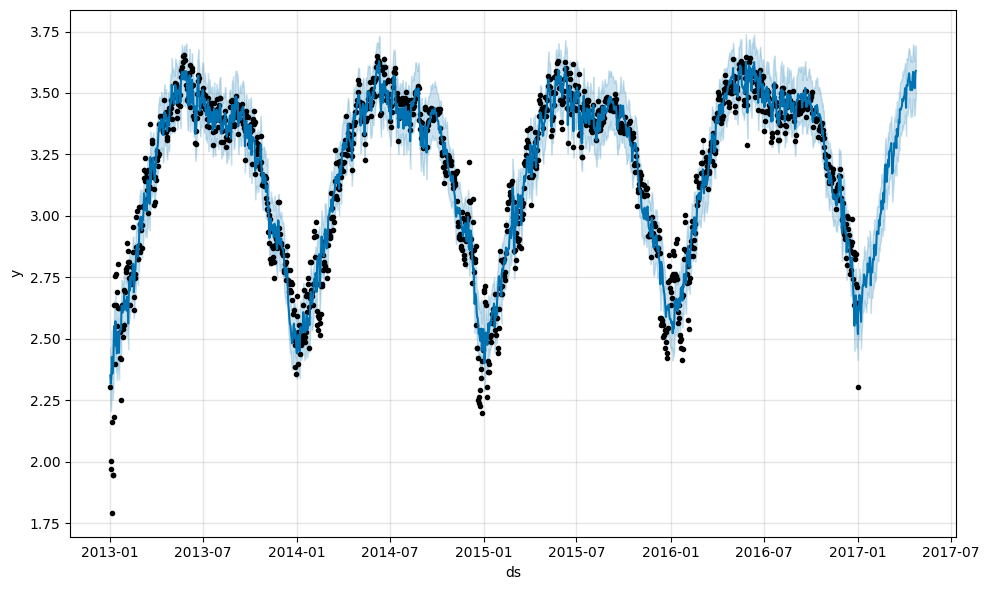

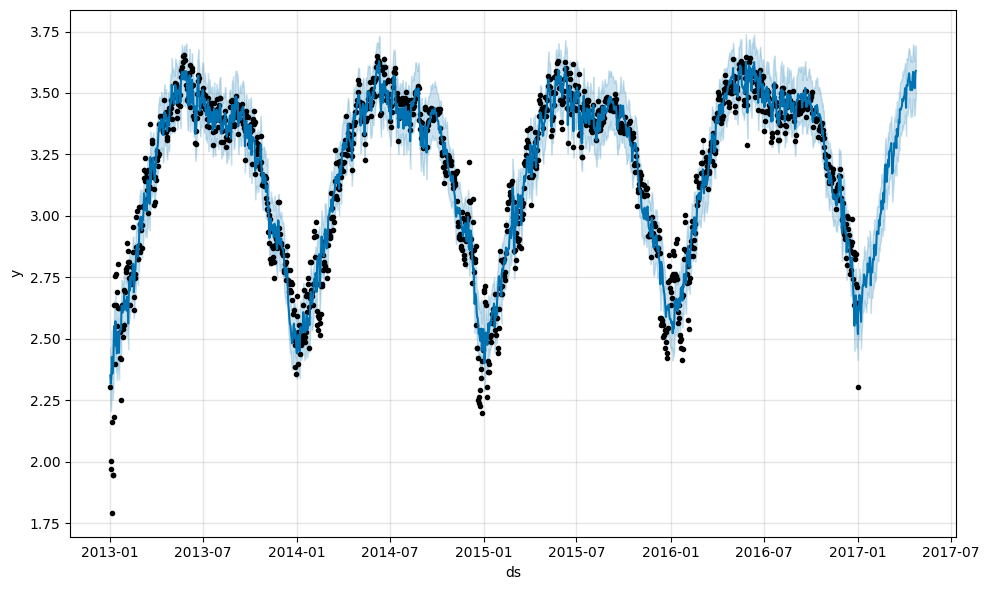

In [ ]:
model_new.plot(forecast_data)

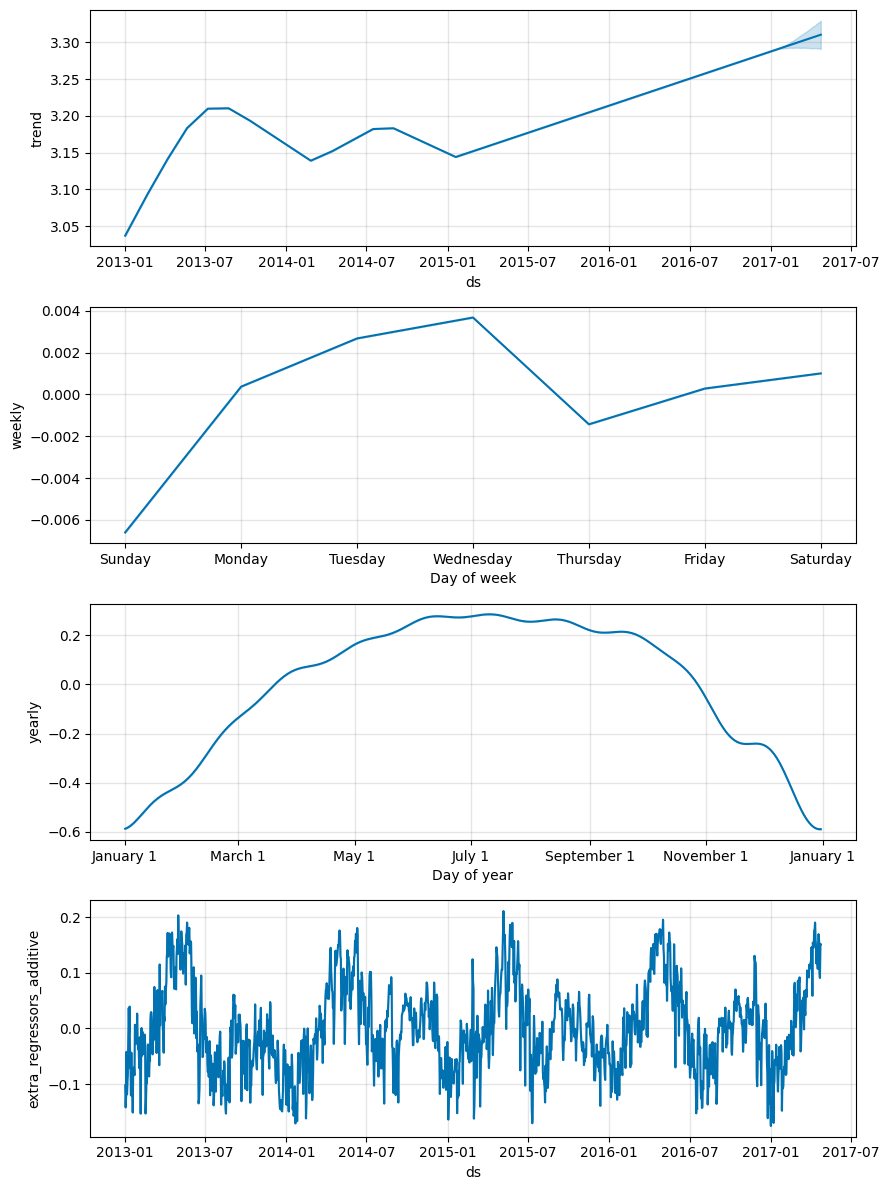

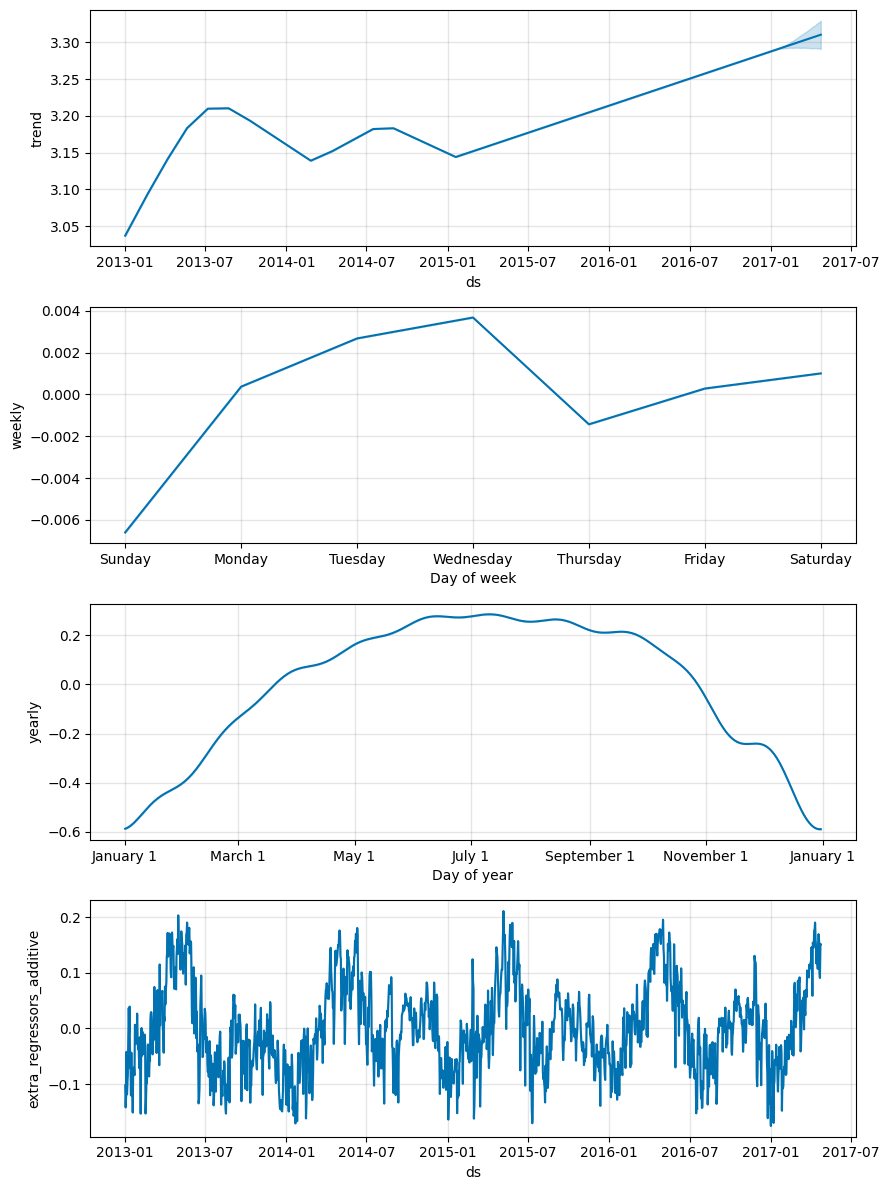

In [ ]:
model_new.plot_components(forecast_data)

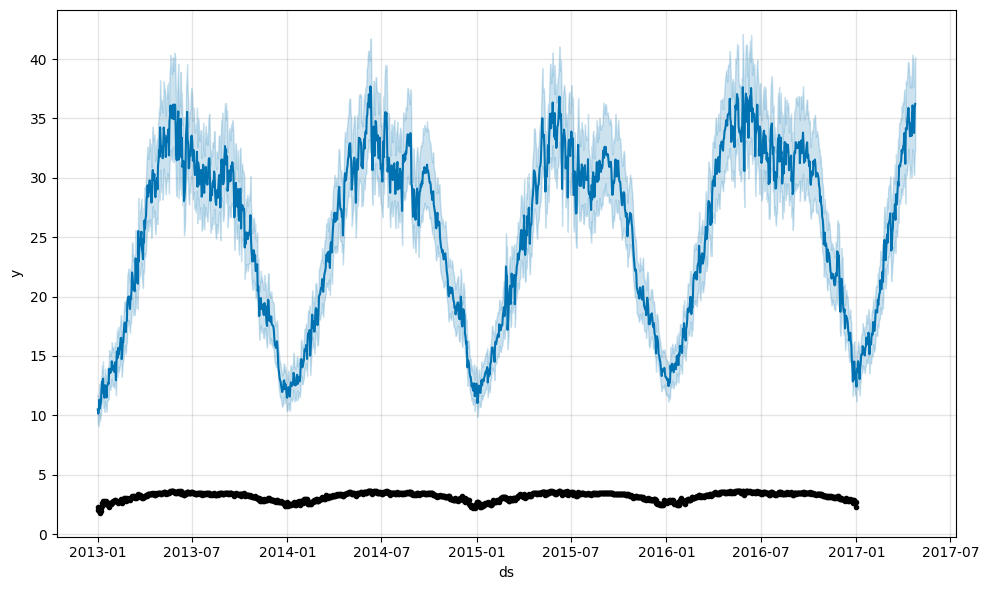

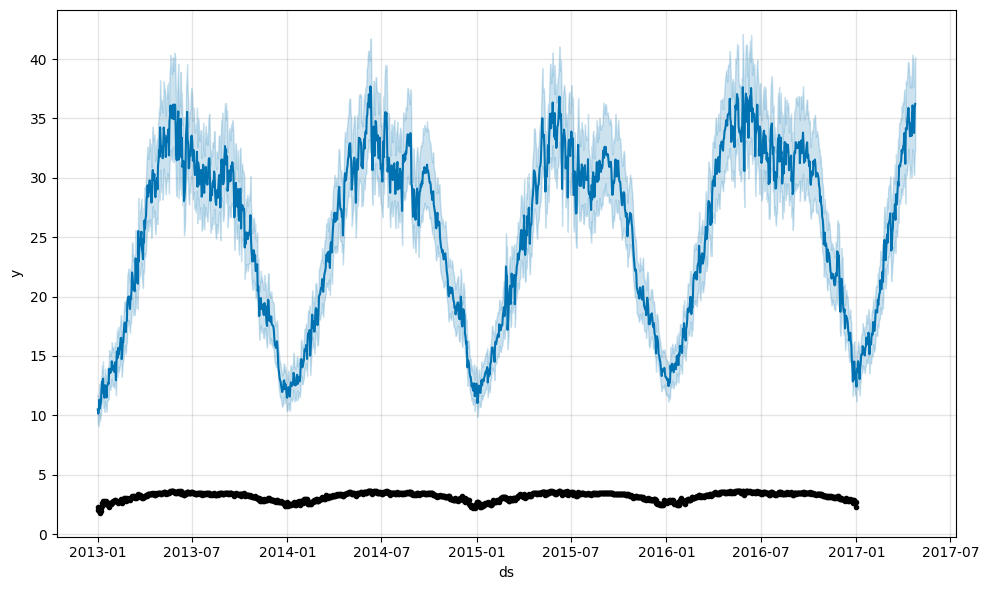

In [ ]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

model_new.plot(forecast_data_orig)

In [ ]:
df_train['y_log']=df_train['y'] #copy the log-transformed data to another column
df_train['y']=df_train['y_orig']

In [ ]:
final_df = pd.DataFrame(forecast_data_orig)
import plotly.graph_objs as go
import plotly.offline as py
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df_train["y_orig"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower])

'temp-plot.html'